<a href="https://colab.research.google.com/github/hernansalinas/CursoMetodosComputacionales/blob/main/Material_sesiones/ExamenFinal_2024_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Luisa María Morales Sánchez

Universidad de Antioquia

Métodos Computacionales

# Evaluación final Métodos computacionales

Profesor: Hernan D. Salinas

Universidad de Antioquia

El examen consta de siete puntos, cada uno con igual valor. Puede utilizar librerías para su solución. La entrega se realiza a través de GitHub. El plazo de entrega es el jueves 8 de agosto a las 11:59 pm. Evite el uso de inteligencia artificial.



En este examen, estudiaremos la caída de un lápiz en posición vertical. El lápiz puede ser modelado como un cuerpo rígido, cuyas ecuaciones de movimiento respecto a su centro de masa pueden ser expresadas de la siguiente manera, de acuerdo con la imagen mostrada en la figura:



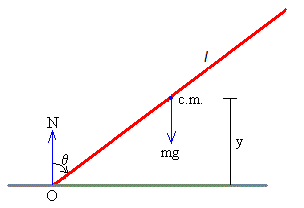


## Ecuaciones de movimiento

### Ecuaciones de movimiento del centro de masa

De acuerdo con la segunda ley de Newton, la ecuación de movimiento a lo largo de la vertical ($y$) puede ser escrita como:

\begin{equation}
m\frac{d^2y}{dt^2} = N - mg
\end{equation}

donde $m$ es la masa del lápiz, $N$ es la fuerza normal y $g$ es la aceleración de la gravedad. Escribiendo las ecuaciones en términos del ángulo $\theta$, tenemos que:

\begin{equation}
-m\frac{l}{2}\cos \theta \left(\frac{d\theta}{dt} \right)^2 - m\frac{l}{2}\sin \theta \frac{d^2\theta}{dt^2} = N - mg
\end{equation}

### Ecuaciones de rotación del centro de masa

La sumatoria de momentos de fuerza se puede escribir como sigue:

\begin{equation}
I_c\frac{d^2\theta}{dt^2} = N\frac{l}{2} \sin \theta
\end{equation}

donde $I_c = \frac{1}{12}ml^2$ es el momento de inercia de una varilla  de masa $m$ y longitud $l$ respecto a un eje perpendicular a la varilla en su centro de masa.

Reemplazando el valor de la normal en la ecuación anterior, obtenemos que la ecuación de movimiento para la posición angular está dada por:

\begin{equation}
\frac{d^2 \theta}{dt^2} = \left( \frac{\frac{2g}{l} - \left(\frac{d\theta}{dt}\right)^2\cos \theta }{\frac{1}{3} + \sin^2 \theta} \right)\sin \theta
\end{equation}

Podemos resolver la ecuación anterior si conocemos las condiciones iniciales: $\theta = \theta_0$ en $t = 0$ y $\frac{d\theta}{dt} = \omega_0 = 0$.

Su tarea en este examen será modelar el movimiento de caída del lápiz. Para ello, asuma que la longitud del lápiz es:

$L = 0.1$ m, $g = 9.8$ m/s² y realice lo siguiente:

1. Utilizando `odeint`, encuentre la solución a la ecuación diferencial para obtener: la posición angular $\theta$, la posición del centro de masa $y = \frac{l}{2}\cos \theta$ y la rapidez angular como función del tiempo, asumiendo que $\theta_0 = \pi/12$, $\omega_0 = 0$.

   Nota: El lápiz llega al piso cuando el ángulo es $\theta = \pi/2$.

2. Empleando `matplotlib`, construya tres gráficos con la información del punto anterior, asegurándose de que tengan las unidades respectivas.

3. Con el programa construido en los puntos 1 y 2, analice el efecto del paso del tiempo en la posición angular, la posición del centro de masa y la rapidez angular. Aproximadamente, ¿a partir de qué tiempo la solución puede ser considerada válida?

4. Con el paso del tiempo calibrado, construya cuatro curvas en una misma figura de la posición angular como función del tiempo, para ángulos iniciales de caída de: $\theta_0 = \pi/12$, $\theta_0 = \pi/6$, $\theta_0 = \pi/4$, $\theta_0 = \pi/3$ y $\omega_0 = 0$.

5. Con los resultados obtenidos, realice una interpolación para cada figura del inciso anterior y encuentre el tiempo de caída, empleando algún método conocido de raíces.

6. El Tiempo que tarda el lápiz en caer $T$, puede ser deducido de la ecuación de conservación de la energía, el cual viene dado por la siguiente integral:  


\begin{equation}
T = \frac{1}{2}\sqrt{\frac{l}{g}} \int_{\theta_0}^{\pi/2} \sqrt{\frac{1/3 + \sin^2 \theta}{\cos \theta_0 - \cos \theta}} \, \mathrm{d}\theta
\end{equation}

Valide sus soluciones del tiempo de caída utilizando la siguiente ecuación.

7. Finalmente, realice un gráfico de $T$ como función de $\theta_0$. ¿Qué puede concluir?


**Referencias**: Para más detalle de los cálulos ver:

1. Crawford F. S. Problem: Moments to remember. Am. J. Phys. 57 (2) February 1989, pp. 105, solución 177
2. http://www.sc.ehu.es/sbweb/fisica3/solido/lapiz/lapiz.html

In [165]:
#Librerias
import numpy as np
import matplotlib.pylab as plt
from scipy.integrate import odeint
from scipy.interpolate import CubicSpline
from scipy import optimize
import scipy as sc

***Punto 1. Solución ecuación diferencial***

In [224]:
#Constantes
L = 0.1 #m
g = 9.8 #m/s^2
#Condiciones iniciales
omega_0 = 0.0
theta_0 = np.pi/12

def lapiz(z, t):
  theta, omega = z
  dtheta_dt = omega
  domega_dt = (((2*g/L)-((omega**2)*np.cos(theta)))*np.sin(theta))/(((1/3)+np.sin(theta)**2))
  return ([dtheta_dt,domega_dt])

z0 = [theta_0,omega_0]
time = np.linspace(0,3,1000)

solution = odeint(lapiz,z0,time)

***Punto 2. Gráficas de la posición angular, rapidez angular y posición del centro de masa***

Text(0.5, 0.98, 'Caida vertical de un lapiz')

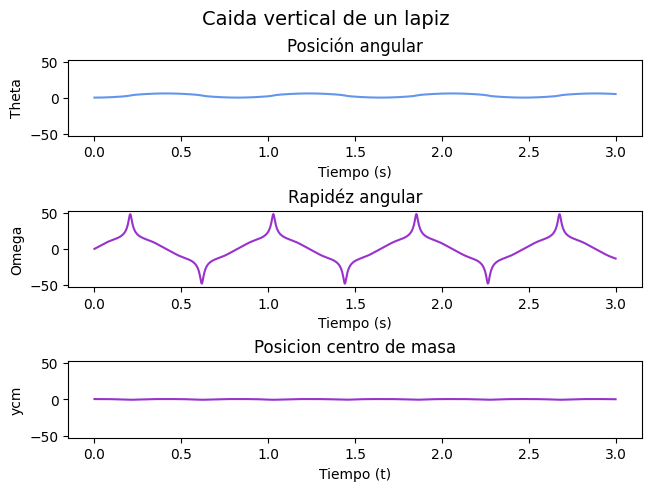

In [225]:
theta = solution[:,0] #Posiciones angulares
omega = solution[:,1] #Velocidades angulares
ycm = 1/2*(np.cos(theta)) # Posicion del centro de masa

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, layout='constrained', sharey=True)
ax1.plot(time,theta,color='cornflowerblue')
ax1.set_title('Posición angular')
ax1.set_xlabel('Tiempo (s)')
ax1.set_ylabel('Theta')
ax2.plot(time,omega,color='darkorchid')
ax2.set_xlabel('Tiempo (s)')
ax2.set_ylabel('Omega')
ax2.set_title('Rapidéz angular')
ax3.plot(time,ycm,color='darkorchid')
ax3.set_xlabel('Tiempo (t)')
ax3.set_ylabel('ycm')
ax3.set_title('Posicion centro de masa')
fig.suptitle('Caida vertical de un lapiz', fontsize=14)

***Punto 3.***

Aproximadamente, ¿a partir de qué tiempo la solución puede ser considerada válida?

R/= Analizando las graficas anteriores se puede ver que el lapiz presenta pequeñas oscilaciones para angulos pequeños como el anterior planteado. Todas presentan un comportamiento estable, desde mi punto de vista puedo notar que a partir de 1 segundo de movimiento la solucion es valida dado que el comportamiento que se muestra se repite una y otra vez.

***Punto 4. Curvas de la posición angular***

Text(0, 0.5, 'Theta')

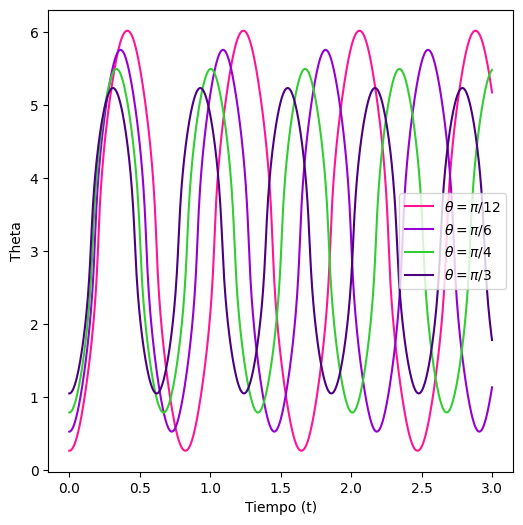

In [226]:
theta0 = [np.pi/12,np.pi/6,np.pi/4,np.pi/3] #Posiciones angulares iniciales

theta1 = [] #Lista vacia de las posiciones angulares a lo largo del tiempo
for i in theta0:
  y0 = [i,omega_0]
  solution = odeint(lapiz,y0,time)
  theta1.append(solution[:,0]) #Posiciones angulares con sus respectivos valores iniciales

#Grafica de las curvas de cada Angulo inicial
fig, ax  = plt.subplots(figsize=(6, 6))
ax.plot(time, theta1[0], label="$θ = \pi/12$", color='deeppink')
ax.plot(time, theta1[1], label="$θ = \pi/6$", color='darkviolet')
ax.plot(time, theta1[2], label="$θ = \pi/4$", color='limegreen')
ax.plot(time, theta1[3], label="$θ = \pi/3$", color='indigo')
ax.legend()
ax.set_xlabel('Tiempo (t)')
ax.set_ylabel('Theta')

***Punto 5. Interporlación***

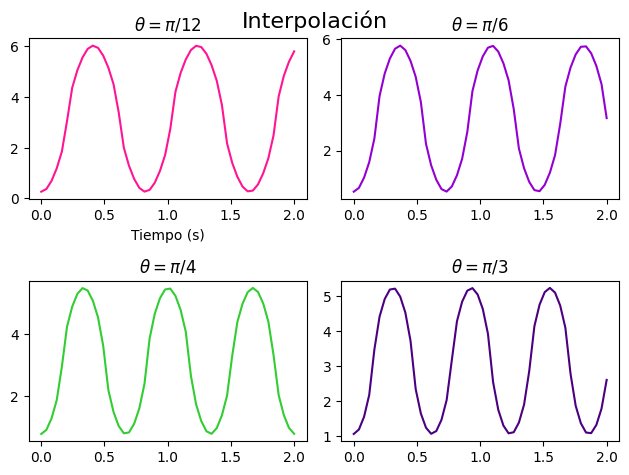

In [170]:
t = np.linspace(np.min(time),np.max(time))
inter1 = CubicSpline(time,theta1[0])
inter2 = CubicSpline(time,theta1[1])
inter3 = CubicSpline(time,theta1[2])
inter4 = CubicSpline(time,theta1[3])

fig, axs  = plt.subplots(2, 2)
axs[0,0].plot(t, inter1(t), color='deeppink')
axs[0,0].set_title('$θ = \pi/12$')
axs[0,0].set_xlabel('Tiempo (s)')
axs[0,1].plot(t, inter2(t), color='darkviolet')
axs[0,1].set_title('$θ = \pi/6$')
axs[1,0].plot(t, inter3(t), color='limegreen')
axs[1,0].set_title('$θ = \pi/4$')
axs[1,1].plot(t, inter4(t), color='indigo')
axs[1,1].set_title('$θ = \pi/3$')

fig.tight_layout()
fig.suptitle('Interpolación', fontsize=16)
plt.show()


***Punto 6. Solución de la ecuación de tiempo***

Para la solucion de esta ecuación que cuenta con una integral, resolví las cuatro integrales para cada ángulo inicial, ya que se me dificulto hacer un ciclo para resolver solo una integral y reemplazar los debidos valores de las ecuaciones diferenciales con su ángulo inicial correspondiente.

In [230]:
theta11 = theta1[0]
theta22 = theta1[1]
theta33 = theta1[2]
theta44 = theta1[3]

def integral1(theta11):
  tt = np.sqrt(((1/3)+np.sin(theta11)**2)/(np.cos(theta0[0])-np.cos(theta11)))
  return tt
def integral2(theta22):
  tt = np.sqrt(((1/3)+np.sin(theta22)**2)/(np.cos(theta0[1])-np.cos(theta22)))
  return tt
def integral3(theta33):
  tt = np.sqrt(((1/3)+np.sin(theta33)**2)/(np.cos(theta0[2])-np.cos(theta33)))
  return tt
def integral4(theta44):
  tt = np.sqrt(((1/3)+np.sin(theta44)**2)/(np.cos(theta0[3])-np.cos(theta44)))
  return tt

T = (1/2)*np.sqrt(L/g)

T_final1 = T*sc.integrate.quad(integral1,theta0[0],np.pi/2)[0]
T_final2 = T*sc.integrate.quad(integral1,theta0[1],np.pi/2)[0]
T_final3 = T*sc.integrate.quad(integral3,theta0[2],np.pi/2)[0]
T_final4 = T*sc.integrate.quad(integral4,theta0[3],np.pi/2)[0]
T_final = [T_final1,T_final2,T_final3,T_final4]
print(f'El tiempo de caida del lapiz con θ_0 = π/12 es de {T_final1} segundos')
print(f'El tiempo de caida del lapiz con θ_0 = π/6 es de {T_final2} segundos')
print(f'El tiempo de caida del lapiz con θ_0 = π/4 es de {T_final3} segundos')
print(f'El tiempo de caida del lapiz con θ_0 = π/3 es de {T_final4} segundos')

El tiempo de caida del lapiz con θ_0 = π/12 es de 0.1479832354352146 segundos
El tiempo de caida del lapiz con θ_0 = π/6 es de 0.08434420639536691 segundos
El tiempo de caida del lapiz con θ_0 = π/4 es de 0.10332124464084698 segundos
El tiempo de caida del lapiz con θ_0 = π/3 es de 0.08416005040768007 segundos


***Punto 7. Gráfica del Tiempo en funcion del angulo inicial***

Text(0.5, 0.98, 'Tiempo en funcion de θ_0')

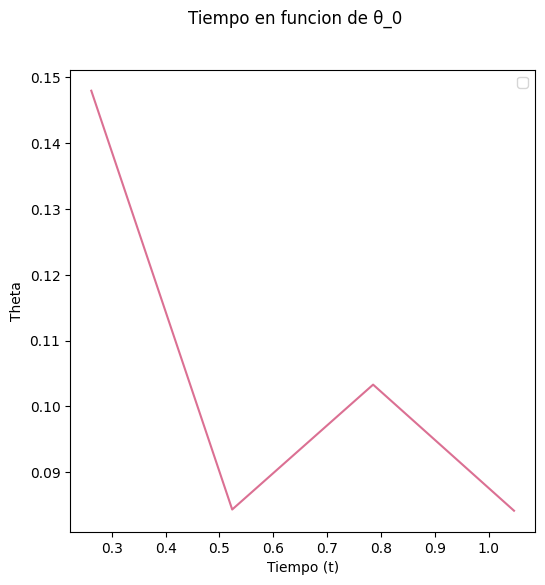

In [237]:
fig, ax  = plt.subplots(figsize=(6, 6))
ax.plot(theta0, T_final,color='palevioletred')
ax.legend()
ax.set_xlabel('Tiempo (t)')
ax.set_ylabel('Theta')
fig.suptitle('Tiempo en funcion de θ_0')